In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
   
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    prices.append(price)

AAPL
AMZN
PEP
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
BKNG
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5173528777753826
0.5280414150129422
F1,score 0.29594272076372313
G-score: 0.40599573734672634
Accuracy 0.4909404659188956
Window: 4
[[445 102]
 [488 124]]
Vol pos 0.348624567591318
Vol neg 0.31370882383496485


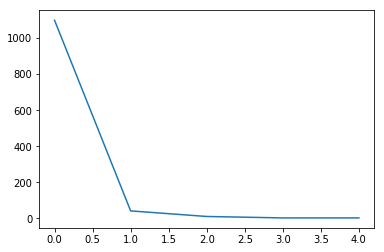

Real Percentage of gain: 1.4180346438688425
Percentage of gain: 0.011457439945496686
Total gain: 13.279172896830659
000000000000000000000000000000000000000000000000
Percentile:  0
[[426 100]
 [462 111]]
0.4886260236578708
Percentile:  1
[[17  1]
 [18  5]]
0.5365853658536586
Percentile:  2
[[2 1]
 [3 4]]
0.6
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5247951703320397
0.548748921484038
F1,score 0.2813238770685579
G-score: 0.39312978770303897
Accuracy 0.47540983606557374
Window: 4
[[432  91]
 [517 119]]
Vol pos 0.3657219466601669
Vol neg 0.3453483074881855


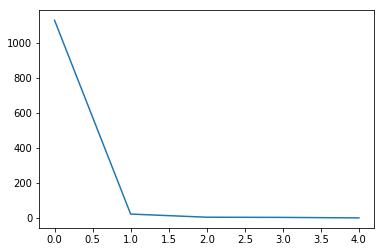

Real Percentage of gain: 0.042566102863781596
Percentage of gain: -0.007298514532411426
Total gain: -8.458978343064842
000000000000000000000000000000000000000000000000
Percentile:  0
[[421  84]
 [511 112]]
0.4725177304964539
Percentile:  1
[[10  6]
 [ 3  3]]
0.5909090909090909
Percentile:  2
[[1 1]
 [1 1]]
0.5
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4731420161883738
0.5846833578792342
F1,score 0.47798742138364786
G-score: 0.5145401776390691
Accuracy 0.5110456553755522
Window: 4
[[195  87]
 [245 152]]
Vol pos 0.26307776388161613
Vol neg 0.2935480940093202


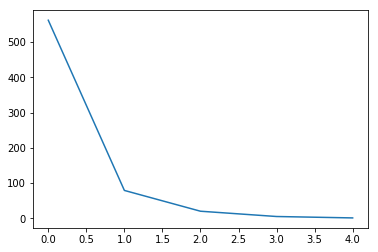

Real Percentage of gain: 2.4652778951996384
Percentage of gain: -0.0090868676644676
Total gain: -6.1699831441735
000000000000000000000000000000000000000000000000
Percentile:  0
[[174  74]
 [188 126]]
0.5338078291814946
Percentile:  1
[[13 13]
 [34 19]]
0.4050632911392405
Percentile:  2
[[ 4  0]
 [12  4]]
0.4
Percentile:  3
[[3 0]
 [1 1]]
0.8
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5204829667960328
0.5220017256255393
F1,score 0.43308550185873607
G-score: 0.4686935016323749
Accuracy 0.47368421052631576
Window: 4
[[316 238]
 [372 233]]
Vol pos 0.40057755948772034
Vol neg 0.3780750600109948


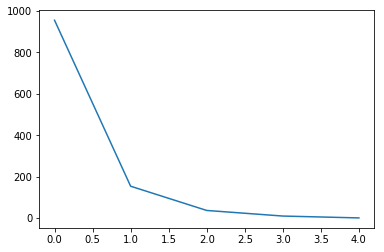

Real Percentage of gain: -1.8567655319573224
Percentage of gain: -0.00923960866949814
Total gain: -10.708706447948344
000000000000000000000000000000000000000000000000
Percentile:  0
[[261 202]
 [314 178]]
0.45968586387434557
Percentile:  1
[[46 29]
 [44 35]]
0.525974025974026
Percentile:  2
[[ 4  5]
 [11 17]]
0.5675675675675675
Percentile:  3
[[3 2]
 [3 2]]
0.5
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5272688079327441
0.5358067299396031
F1,score 0.22340425531914893
G-score: 0.3513528261355722
Accuracy 0.49611734253666956
Window: 4
[[491  47]
 [537  84]]
Vol pos 0.37176531316765454
Vol neg 0.35769442502926535


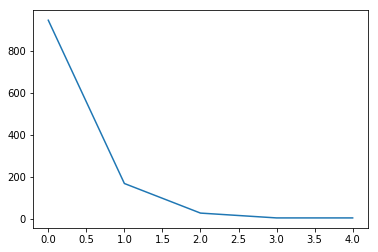

Real Percentage of gain: -1.7455506080041796
Percentage of gain: 0.004203201772485247
Total gain: 4.871510854310401
000000000000000000000000000000000000000000000000
Percentile:  0
[[403  38]
 [445  61]]
0.48996832101372756
Percentile:  1
[[72  5]
 [73 19]]
0.5384615384615384
Percentile:  2
[[12  0]
 [12  4]]
0.5714285714285714
Percentile:  3
[[1 3]
 [1 0]]
0.2
Percentile:  4
[[3 0]
 [2 0]]
0.6
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5162750592800173
0.5358067299396031
F1,score 0.4093686354378819
G-score: 0.4768776741961814
Accuracy 0.4995685936151855
Window: 4
[[378 160]
 [420 201]]
Vol pos 0.4231100180978387
Vol neg 0.41862515842326514


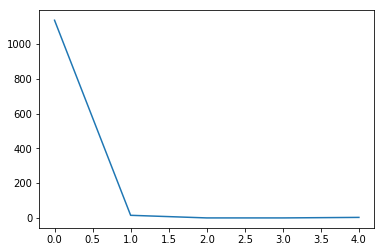

Real Percentage of gain: -1.5669458765762956
Percentage of gain: 0.0018792999078126491
Total gain: 2.1781085931548603
000000000000000000000000000000000000000000000000
Percentile:  0
[[375 156]
 [412 193]]
0.5
Percentile:  1
[[3 4]
 [7 1]]
0.26666666666666666
Percentile:  2
Percentile:  3
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5315800819142057
0.5220017256255393
F1,score 0.2964824120603015
G-score: 0.4115105484281216
Accuracy 0.5168248490077653
Window: 4
[[481  73]
 [487 118]]
Vol pos 0.5346985143015678
Vol neg 0.47252487870686244


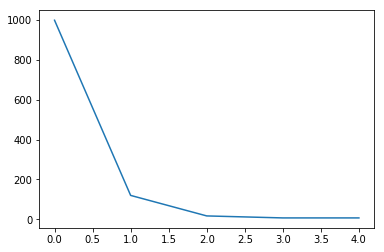

Real Percentage of gain: -0.6506063847924586
Percentage of gain: 0.04803319930180858
Total gain: 55.670477990796144
000000000000000000000000000000000000000000000000
Percentile:  0
[[409  64]
 [432  94]]
0.5035035035035035
Percentile:  1
[[55  8]
 [39 18]]
0.6083333333333333
Percentile:  2
[[8 0]
 [8 1]]
0.5294117647058824
Percentile:  3
[[6 0]
 [1 0]]
0.8571428571428571
Percentile:  4
[[2 1]
 [2 2]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5418283742992669
0.5314926660914582
F1,score 0.4405113077679449
G-score: 0.49507874458009965
Accuracy 0.5090595340811044
Window: 4
[[366 177]
 [392 224]]
Vol pos 0.40683534218890693
Vol neg 0.3596648185130915


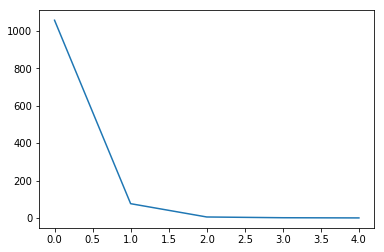

Real Percentage of gain: 3.3901043631333523
Percentage of gain: 0.03052939616695947
Total gain: 35.38357015750603
000000000000000000000000000000000000000000000000
Percentile:  0
[[332 166]
 [358 200]]
0.5037878787878788
Percentile:  1
[[30  8]
 [24 15]]
0.5844155844155844
Percentile:  2
[[3 0]
 [1 2]]
0.8333333333333334
Percentile:  3
[[0 2]
 [0 0]]
0.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49784389823199654
0.5090595340811044
F1,score 0.520164609053498
G-score: 0.4947070235712374
Accuracy 0.4969801553062985
Window: 4
[[260 309]
 [274 316]]
Vol pos 0.49955017285732367
Vol neg 0.501364328128652


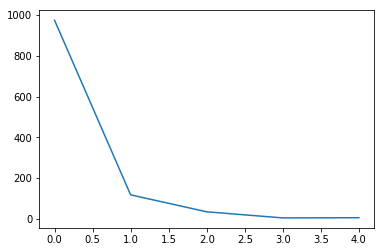

Real Percentage of gain: -5.91068603480517
Percentage of gain: -0.00392968398031548
Total gain: -4.554503733185641
000000000000000000000000000000000000000000000000
Percentile:  0
[[215 270]
 [219 270]]
0.49794661190965095
Percentile:  1
[[29 31]
 [37 21]]
0.423728813559322
Percentile:  2
[[15  6]
 [ 5  9]]
0.6857142857142857
Percentile:  3
[[1 1]
 [2 1]]
0.4
Percentile:  4
[[0 1]
 [3 2]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5205863332614787
0.545297670405522
F1,score 0.35675675675675683
G-score: 0.44459499894642907
Accuracy 0.48662640207075064
Window: 4
[[399 128]
 [467 165]]
Vol pos 0.5176803142200408
Vol neg 0.5218599023011142


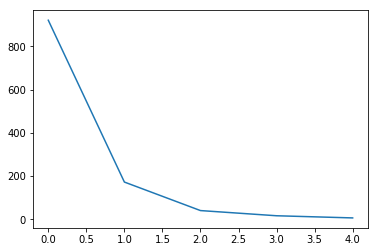

Real Percentage of gain: -0.7854977417559729
Percentage of gain: -0.01599218692757548
Total gain: -18.53494464905998
000000000000000000000000000000000000000000000000
Percentile:  0
[[323 102]
 [371 125]]
0.48642779587404994
Percentile:  1
[[56 15]
 [71 30]]
0.5
Percentile:  2
[[11  7]
 [17  5]]
0.4
Percentile:  3
[[8 3]
 [3 2]]
0.625
Percentile:  4
[[1 0]
 [4 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.5163863734368263
0.5418464193270061
F1,score 0.2850299401197605
G-score: 0.39760172635232544
Accuracy 0.48490077653149266
Window: 4
[[443  88]
 [509 119]]
Vol pos 0.5053627079012822
Vol neg 0.5772260611852436


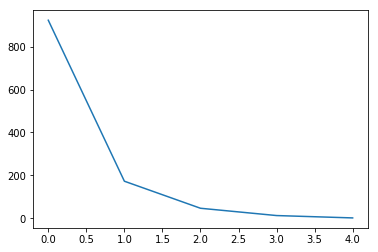

Real Percentage of gain: -1.821822460069721
Percentage of gain: -0.052277926390914393
Total gain: -60.590116687069774
000000000000000000000000000000000000000000000000
Percentile:  0
[[370  71]
 [390  91]]
0.5
Percentile:  1
[[52 11]
 [86 24]]
0.4393063583815029
Percentile:  2
[[12  5]
 [27  3]]
0.3191489361702128
Percentile:  3
[[7 1]
 [5 0]]
0.5384615384615384
Percentile:  4
[[1 0]
 [0 1]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
1.172681553570028
0.000939946799010321
Diff in tren train and test
0.5128939828080229
0.5252293577981652
F1,score 0.5390070921985816
G-score: 0.5526515243444947
Accuracy 0.5527522935779816
Window: 4
[[127  80]
 [115 114]]
Vol pos 0.23213480100373124
Vol neg 0.2923947609181178


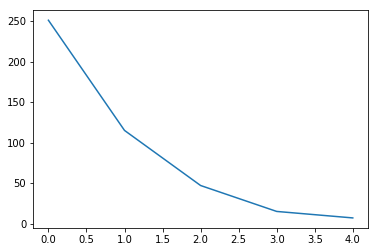

Real Percentage of gain: 8.577624580425857
Percentage of gain: -0.002459842516361791
Total gain: -1.0724913371337408
000000000000000000000000000000000000000000000000
Percentile:  0
[[75 45]
 [57 74]]
0.5936254980079682
Percentile:  1
[[32 17]
 [32 33]]
0.5701754385964912
Percentile:  2
[[14 12]
 [16  5]]
0.40425531914893614
Percentile:  3
[[4 2]
 [8 1]]
0.3333333333333333
Percentile:  4
[[2 2]
 [2 1]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5432205216641518
0.5470232959447799
F1,score 0.27803738317757004
G-score: 0.38842343584030753
Accuracy 0.46678170836928384
Window: 4
[[422 103]
 [515 119]]
Vol pos 0.4570206038143007
Vol neg 0.40256533124858385


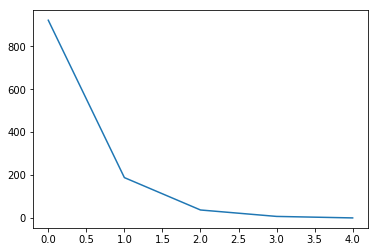

Real Percentage of gain: -3.6249367167116957
Percentage of gain: -0.0013263399897222939
Total gain: -1.5372280480881386
000000000000000000000000000000000000000000000000
Percentile:  0
[[338  82]
 [417  85]]
0.45878524945770066
Percentile:  1
[[66 19]
 [77 26]]
0.48936170212765956
Percentile:  2
[[12  2]
 [17  6]]
0.4864864864864865
Percentile:  3
[[5 0]
 [0 2]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5051746442432082
0.5323554788610871
F1,score 0.48884924174843886
G-score: 0.5056038276975874
Accuracy 0.5056082830025884
Window: 4
[[312 230]
 [343 274]]
Vol pos 0.44655190760067415
Vol neg 0.3938948643967464


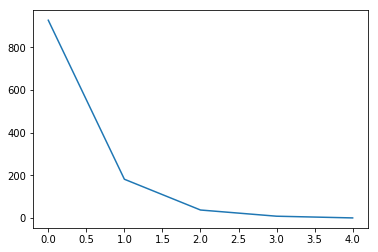

Real Percentage of gain: -3.263891572939559
Percentage of gain: 0.03104198494793733
Total gain: 35.977660554659366
000000000000000000000000000000000000000000000000
Percentile:  0
[[251 191]
 [277 207]]
0.4946004319654428
Percentile:  1
[[44 31]
 [53 54]]
0.5384615384615384
Percentile:  2
[[14  6]
 [ 9  9]]
0.6052631578947368
Percentile:  3
[[1 2]
 [3 3]]
0.4444444444444444
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5517464424320828
0.5409836065573771
F1,score 0.4311152764761012
G-score: 0.47119672936092183
Accuracy 0.47627264883520276
Window: 4
[[322 210]
 [397 230]]
Vol pos 0.44199041335908085
Vol neg 0.3944717682484113


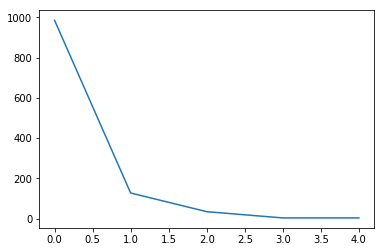

Real Percentage of gain: -4.756407437269405
Percentage of gain: 0.00391229063626139
Total gain: 4.534344847426951
000000000000000000000000000000000000000000000000
Percentile:  0
[[278 181]
 [341 186]]
0.47058823529411764
Percentile:  1
[[30 22]
 [48 27]]
0.44881889763779526
Percentile:  2
[[14  7]
 [ 4  9]]
0.6764705882352942
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5191893057352307
0.5289042277825712
F1,score 0.5604483586869495
G-score: 0.5214277467220731
Accuracy 0.5263157894736842
Window: 4
[[260 286]
 [263 350]]
Vol pos 0.4668390129029619
Vol neg 0.41430692352673026


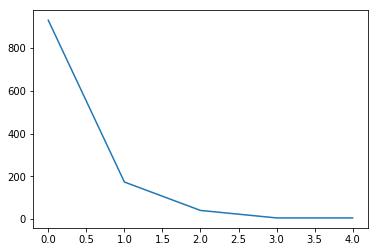

Real Percentage of gain: 7.437762687346778
Percentage of gain: 0.04945409564679196
Total gain: 57.31729685463188
000000000000000000000000000000000000000000000000
Percentile:  0
[[211 238]
 [212 269]]
0.5161290322580645
Percentile:  1
[[37 37]
 [43 56]]
0.5375722543352601
Percentile:  2
[[ 4 11]
 [ 7 18]]
0.55
Percentile:  3
[[2 0]
 [0 3]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.5337357189049364
0.5306298533218292
F1,score 0.4754856614246069
G-score: 0.5072849260268626
Accuracy 0.5107851596203624
Window: 4
[[335 209]
 [358 257]]
Vol pos 0.5160542001538811
Vol neg 0.4915294037081858


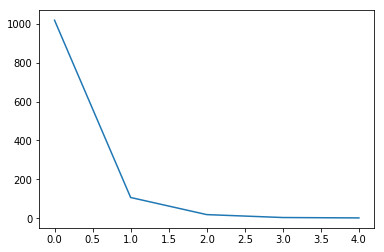

Real Percentage of gain: -1.1651968826906896
Percentage of gain: 0.02312934822136001
Total gain: 26.806914588556253
000000000000000000000000000000000000000000000000
Percentile:  0
[[293 182]
 [317 226]]
0.5098231827111984
Percentile:  1
[[33 22]
 [29 23]]
0.5233644859813084
Percentile:  2
[[5 5]
 [4 5]]
0.5263157894736842
Percentile:  3
[[1 0]
 [2 1]]
0.5
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5026957084321759
0.5220017256255393
F1,score 0.6394822006472491
G-score: 0.398972335040983
Accuracy 0.5194132873166523
Window: 4
[[108 446]
 [111 494]]
Vol pos 0.3880638480242785
Vol neg 0.432384225291245


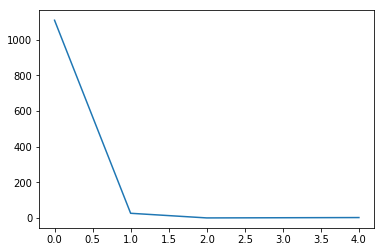

Real Percentage of gain: 6.547652408033154
Percentage of gain: -0.006232594457815187
Total gain: -7.223576976607801
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 433]
 [107 462]]
0.5130748422001803
Percentile:  1
[[ 1  9]
 [ 1 15]]
0.6153846153846154
Percentile:  2
Percentile:  3
[[0 1]
 [0 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.5281310627290364
0.543572044866264
F1,score 0.3424036281179138
G-score: 0.4403644456135651
Accuracy 0.4995685936151855
Window: 4
[[428 101]
 [479 151]]
Vol pos 0.293723316389922
Vol neg 0.31350128669562816


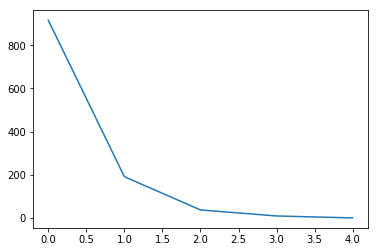

Real Percentage of gain: 0.7455132852545467
Percentage of gain: -0.01015094572364062
Total gain: -11.764946093699479
000000000000000000000000000000000000000000000000
Percentile:  0
[[348  82]
 [372 114]]
0.5043668122270742
Percentile:  1
[[71 11]
 [76 33]]
0.5445026178010471
Percentile:  2
[[ 7  5]
 [22  3]]
0.2702702702702703
Percentile:  3
[[2 3]
 [3 1]]
0.3333333333333333
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.510023712006898
0.5263157894736842
F1,score 0.4238143289606458
G-score: 0.4868604067186065
Accuracy 0.5073339085418465
Window: 4
[[378 171]
 [400 210]]
Vol pos 0.440334816425298
Vol neg 0.462253730768902


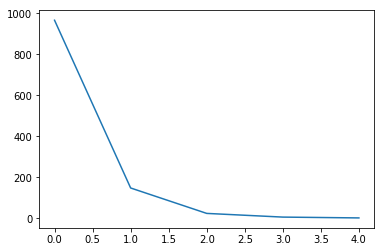

Real Percentage of gain: 0.6643351383874971
Percentage of gain: -0.00433995531576171
Total gain: -5.0300082109678215
000000000000000000000000000000000000000000000000
Percentile:  0
[[329 139]
 [329 169]]
0.515527950310559
Percentile:  1
[[43 30]
 [50 25]]
0.4594594594594595
Percentile:  2
[[6 2]
 [8 8]]
0.5833333333333334
Percentile:  3
[[0 0]
 [3 3]]
0.5
Percentile:  4
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5002994746694196
Mean gain over portfolio :  5.0186786833436745
Real mean gain over portfolio 0.20702819284704893


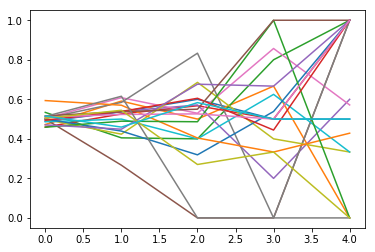

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
   
    
    
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

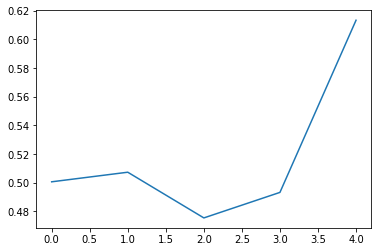

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5251082251082251
0.5597920277296361
F1,score 0.24150058616647127
G-score: 0.3560911496409138
Accuracy 0.4393414211438475
Window: 28
[[404 104]
 [543 103]]
Vol pos 0.937257669899942
Vol neg 0.9939885486890933


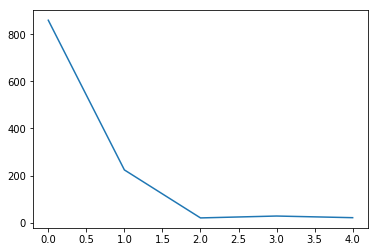

Real Percentage of gain: -24.796680887702056
Percentage of gain: -0.14551209043550498
Total gain: -167.92095236257273
000000000000000000000000000000000000000000000000
Percentile:  0
[[339  69]
 [403  48]]
0.45052386495925495
Percentile:  1
[[64 34]
 [97 29]]
0.41517857142857145
Percentile:  2
[[ 0  1]
 [10  9]]
0.45
Percentile:  3
[[ 0  0]
 [20  8]]
0.2857142857142857
Percentile:  4
[[ 0  0]
 [13  8]]
0.38095238095238093
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5680883308075341
0.6377816291161178
F1,score 0.567237163814181
G-score: 0.5577363122931331
Accuracy 0.5398613518197574
Window: 28
[[275 143]
 [388 348]]
Vol pos 0.9586563554212149
Vol neg 1.1179905499849896


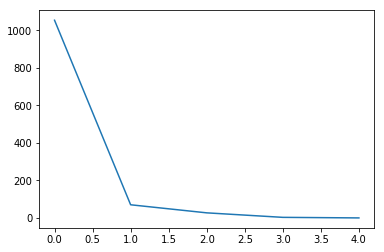

Real Percentage of gain: 31.025342481256086
Percentage of gain: 0.0031108556199197063
Total gain: 3.589927385387341
000000000000000000000000000000000000000000000000
Percentile:  0
[[270 114]
 [359 309]]
0.5503802281368821
Percentile:  1
[[ 4 22]
 [15 29]]
0.4714285714285714
Percentile:  2
[[ 0  7]
 [14  6]]
0.2222222222222222
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44942571322712116
0.7507418397626113
F1,score 0.14802065404475043
G-score: 0.26228519842961867
Accuracy 0.2655786350148368
Window: 28
[[136  32]
 [463  43]]
Vol pos 0.5135135662396103
Vol neg 0.7888084868147541


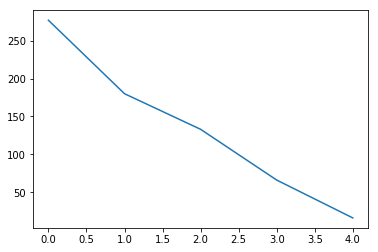

Real Percentage of gain: -31.233442112916602
Percentage of gain: -0.44293957361485614
Total gain: -298.54127261641304
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 95   1]
 [171  10]]
0.37906137184115524
Percentile:  1
[[ 26   6]
 [131  17]]
0.2388888888888889
Percentile:  2
[[  7  11]
 [103  12]]
0.14285714285714285
Percentile:  3
[[ 5  9]
 [49  3]]
0.12121212121212122
Percentile:  4
[[3 5]
 [7 1]]
0.25
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5540160207837194
0.561525129982669
F1,score 0.5430242272347536
G-score: 0.5286928940843698
Accuracy 0.5259965337954939
Window: 28
[[282 224]
 [323 325]]
Vol pos 1.3337994544922314
Vol neg 1.083468607433024


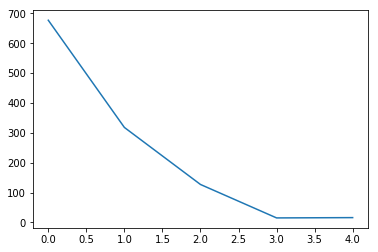

Real Percentage of gain: 15.568922385922704
Percentage of gain: 0.18800601439421172
Total gain: 216.9589406109203
000000000000000000000000000000000000000000000000
Percentile:  0
[[165 160]
 [182 169]]
0.4940828402366864
Percentile:  1
[[ 85  47]
 [102  85]]
0.5329153605015674
Percentile:  2
[[12 11]
 [38 65]]
0.6111111111111112
Percentile:  3
[[6 2]
 [1 6]]
0.8
Percentile:  4
[[13  3]
 [ 0  0]]
0.8125
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.554978354978355
0.5866551126516465
F1,score 0.14555256064690028
G-score: 0.27914915296818277
Accuracy 0.4506065857885615
Window: 28
[[466  11]
 [623  54]]
Vol pos 0.8900046005175604
Vol neg 0.809865269560017


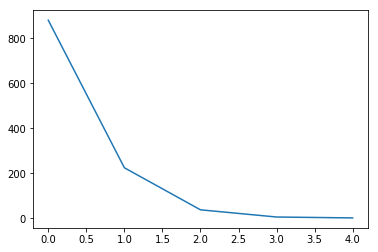

Real Percentage of gain: -13.897354194751834
Percentage of gain: -0.0438927111195142
Total gain: -50.65218863191939
000000000000000000000000000000000000000000000000
Percentile:  0
[[357   9]
 [483  32]]
0.44154370034052215
Percentile:  1
[[ 92   1]
 [122  10]]
0.4533333333333333
Percentile:  2
[[11  0]
 [17 10]]
0.5526315789473685
Percentile:  3
[[4 1]
 [0 1]]
0.8333333333333334
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5322510822510822
0.58578856152513
F1,score 0.4257602862254025
G-score: 0.4492379778180163
Accuracy 0.4436741767764298
Window: 28
[[274 204]
 [438 238]]
Vol pos 1.4313883023647733
Vol neg 1.1840876105001148


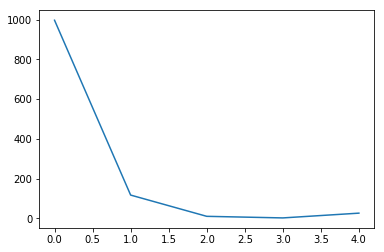

Real Percentage of gain: -19.924176968342866
Percentage of gain: -0.023668487981204245
Total gain: -27.3134351303097
000000000000000000000000000000000000000000000000
Percentile:  0
[[263 180]
 [377 177]]
0.44132397191574724
Percentile:  1
[[ 7 18]
 [55 37]]
0.37606837606837606
Percentile:  2
[[4 6]
 [0 0]]
0.4
Percentile:  3
[[2]]
1.0
Percentile:  4
[[ 0  0]
 [ 4 22]]
0.8461538461538461
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5556277056277056
0.5424610051993067
F1,score 0.11160058737151247
G-score: 0.24238074750195998
Accuracy 0.475736568457539
Window: 28
[[511  17]
 [588  38]]
Vol pos 1.2952566039888167
Vol neg 1.1535045296234


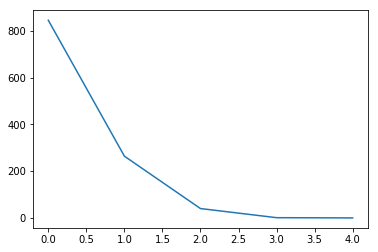

Real Percentage of gain: 18.10381784345395
Percentage of gain: 0.011460689053469092
Total gain: 13.22563516770333
000000000000000000000000000000000000000000000000
Percentile:  0
[[363  14]
 [446  22]]
0.4556213017751479
Percentile:  1
[[113   3]
 [135  13]]
0.4772727272727273
Percentile:  2
[[34  0]
 [ 3  3]]
0.925
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5869235765317168
0.5233968804159446
F1,score 0.5227906976744185
G-score: 0.5518290969108746
Accuracy 0.5554592720970537
Window: 28
[[360 190]
 [323 281]]
Vol pos 0.9583719138734786
Vol neg 0.8932131682395051


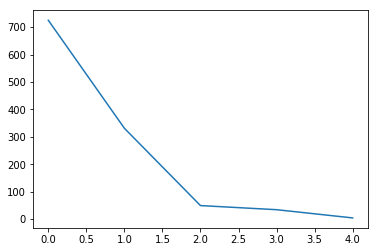

Real Percentage of gain: 39.509996227838556
Percentage of gain: 0.13526693369673626
Total gain: 156.09804148603365
000000000000000000000000000000000000000000000000
Percentile:  0
[[208 119]
 [219 179]]
0.5337931034482759
Percentile:  1
[[120  55]
 [ 76  80]]
0.6042296072507553
Percentile:  2
[[13  6]
 [11 19]]
0.6530612244897959
Percentile:  3
[[15  9]
 [ 9  1]]
0.47058823529411764
Percentile:  4
[[3 1]
 [0 0]]
0.75
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4684996752543841
0.5051993067590987
F1,score 0.6134880348078318
G-score: 0.5015918222464026
Accuracy 0.5381282495667244
Window: 28
[[198 373]
 [160 423]]
Vol pos 1.6180018107829715
Vol neg 1.2630161095298382


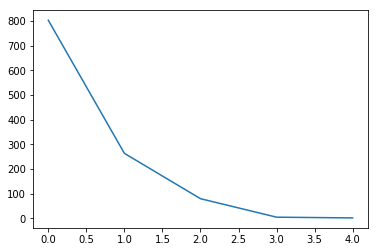

Real Percentage of gain: 51.02881250299623
Percentage of gain: 0.28734102089845887
Total gain: 331.59153811682154
000000000000000000000000000000000000000000000000
Percentile:  0
[[115 275]
 [129 284]]
0.49688667496886674
Percentile:  1
[[60 81]
 [25 97]]
0.596958174904943
Percentile:  2
[[21 17]
 [ 6 35]]
0.7088607594936709
Percentile:  3
[[2 0]
 [0 2]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5742424242424242
0.5805892547660312
F1,score 0.38315789473684214
G-score: 0.4654459590456321
Accuracy 0.49220103986135183
Window: 28
[[386  98]
 [488 182]]
Vol pos 1.552816149280165
Vol neg 1.326873209063683


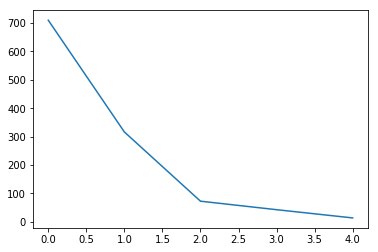

Real Percentage of gain: 29.476223473365067
Percentage of gain: 0.09051288759082805
Total gain: 104.45187227981557
000000000000000000000000000000000000000000000000
Percentile:  0
[[259  57]
 [317  78]]
0.4739803094233474
Percentile:  1
[[ 87  35]
 [127  65]]
0.4840764331210191
Percentile:  2
[[17  5]
 [27 24]]
0.5616438356164384
Percentile:  3
[[20  1]
 [12  8]]
0.6829268292682927
Percentile:  4
[[3 0]
 [3 7]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.5667893483437974
0.610051993067591
F1,score 0.3025583982202448
G-score: 0.4096993231060253
Accuracy 0.45667244367417675
Window: 28
[[391  59]
 [568 136]]
Vol pos 1.4328000460296422
Vol neg 1.7175894751880934


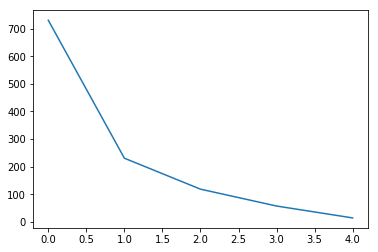

Real Percentage of gain: -50.854485130814105
Percentage of gain: -0.27889339400807023
Total gain: -321.84297668531303
000000000000000000000000000000000000000000000000
Percentile:  0
[[314  37]
 [324  54]]
0.50480109739369
Percentile:  1
[[ 49  13]
 [124  45]]
0.4069264069264069
Percentile:  2
[[11  4]
 [79 25]]
0.3025210084033613
Percentile:  3
[[ 9  2]
 [37 10]]
0.3275862068965517
Percentile:  4
[[8 2]
 [3 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6778197592411772
0.0027997872161690247
Diff in tren train and test
0.5544611819235226
0.6125290023201856
F1,score 0.17721518987341772
G-score: 0.30136085225764325
Accuracy 0.39675174013921116
Window: 28
[[143  24]
 [236  28]]
Vol pos 0.4919735852716122
Vol neg 0.5088324710664001


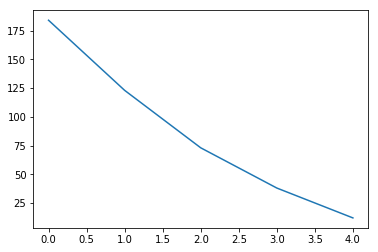

Real Percentage of gain: -21.389553403536624
Percentage of gain: -0.1117609266724323
Total gain: -48.16895939581832
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 63   9]
 [102  10]]
0.3967391304347826
Percentile:  1
[[43  4]
 [68  7]]
0.4098360655737705
Percentile:  2
[[23  4]
 [40  6]]
0.3972602739726027
Percentile:  3
[[ 8  3]
 [22  5]]
0.34210526315789475
Percentile:  4
[[6 4]
 [3 0]]
0.46153846153846156
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5733766233766234
0.6559792027729636
F1,score 0.28361344537815125
G-score: 0.38907976200527356
Accuracy 0.4090121317157712
Window: 28
[[337  60]
 [622 135]]
Vol pos 1.208251284621244
Vol neg 1.061658168854824


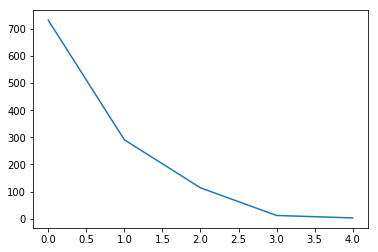

Real Percentage of gain: -21.221020693685674
Percentage of gain: -0.13323766448679603
Total gain: -153.7562648177626
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  41]
 [415  90]]
0.3770491803278688
Percentile:  1
[[108   5]
 [157  21]]
0.44329896907216493
Percentile:  2
[[35 10]
 [49 20]]
0.4824561403508772
Percentile:  3
[[5 3]
 [1 3]]
0.6666666666666666
Percentile:  4
[[2 1]
 [0 0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5050876813163022
0.6074523396880416
F1,score 0.5459016393442623
G-score: 0.5291388357797946
Accuracy 0.5199306759098787
Window: 28
[[267 186]
 [368 333]]
Vol pos 1.0280903066062135
Vol neg 1.0495436812311474


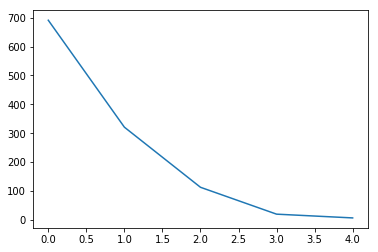

Real Percentage of gain: 9.424297471682765
Percentage of gain: 0.030681962358468384
Total gain: 35.406984561672516
000000000000000000000000000000000000000000000000
Percentile:  0
[[189  88]
 [239 175]]
0.5267727930535456
Percentile:  1
[[ 46  60]
 [102 113]]
0.4953271028037383
Percentile:  2
[[20 23]
 [25 45]]
0.5752212389380531
Percentile:  3
[[ 8 11]
 [ 1  0]]
0.4
Percentile:  4
[[4 3]
 [0 0]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6269755358302663
0.5883882149046794
F1,score 0.46603475513428116
G-score: 0.40912390966481266
Accuracy 0.41421143847487
Window: 28
[[183 292]
 [384 295]]
Vol pos 1.066408955494812
Vol neg 0.8697259527833011


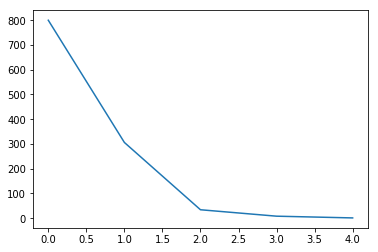

Real Percentage of gain: -37.41899386742899
Percentage of gain: -0.06775672734401335
Total gain: -78.1912633549914
000000000000000000000000000000000000000000000000
Percentile:  0
[[138 238]
 [261 163]]
0.37625
Percentile:  1
[[ 45  53]
 [104 104]]
0.4869281045751634
Percentile:  2
[[ 0  1]
 [16 17]]
0.5
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48148949989175144
0.6117850953206239
F1,score 0.6363636363636364
G-score: 0.5242018079048992
Accuracy 0.5563258232235702
Window: 28
[[194 254]
 [258 448]]
Vol pos 1.3235697022368222
Vol neg 1.0780987099238617


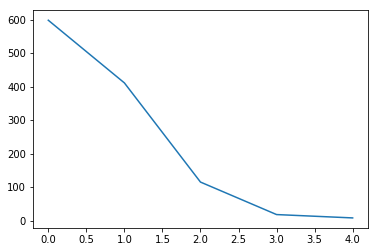

Real Percentage of gain: -7.721187768714591
Percentage of gain: 0.25801144658147546
Total gain: 297.74520935502267
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 80 128]
 [153 237]]
0.5301003344481605
Percentile:  1
[[ 79 108]
 [ 90 134]]
0.5182481751824818
Percentile:  2
[[30 11]
 [15 59]]
0.7739130434782608
Percentile:  3
[[5 5]
 [0 8]]
0.7222222222222222
Percentile:  4
[[0 2]
 [0 6]]
0.75
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5857142857142857
0.6317157712305026
F1,score 0.49491525423728816
G-score: 0.5006958766046175
Accuracy 0.48353552859618715
Window: 28
[[266 159]
 [437 292]]
Vol pos 1.3394818551796488
Vol neg 1.3541625377340547


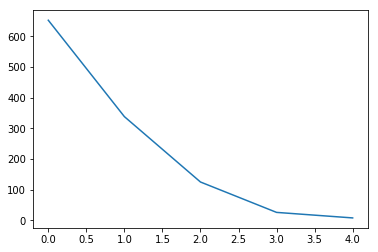

Real Percentage of gain: -13.599261689909765
Percentage of gain: -0.05168977235637142
Total gain: -59.64999729925262
000000000000000000000000000000000000000000000000
Percentile:  0
[[158  79]
 [259 156]]
0.4815950920245399
Percentile:  1
[[ 65  39]
 [139  95]]
0.47337278106508873
Percentile:  2
[[34 23]
 [33 35]]
0.552
Percentile:  3
[[ 7 11]
 [ 4  4]]
0.4230769230769231
Percentile:  4
[[2 6]
 [0 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4744478129060199
0.5433275563258232
F1,score 0.6960142772159428
G-score: 0.32044452206106944
Accuracy 0.5571923743500866
Window: 28
[[ 58 469]
 [ 42 585]]
Vol pos 0.9347542347965243
Vol neg 1.183530383992476


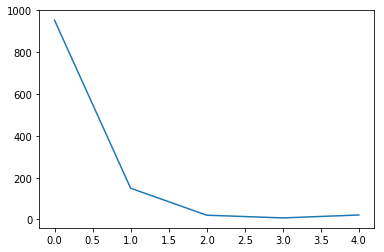

Real Percentage of gain: 86.04975411412407
Percentage of gain: -0.003238347700164803
Total gain: -3.737053245990182
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53 381]
 [ 39 479]]
0.5588235294117647
Percentile:  1
[[  4  44]
 [  1 100]]
0.697986577181208
Percentile:  2
[[ 0 16]
 [ 0  4]]
0.2
Percentile:  3
[[1 6]
 [0 0]]
0.14285714285714285
Percentile:  4
[[ 0 21]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5541125541125541
0.5953206239168111
F1,score 0.1920768307322929
G-score: 0.31621347364853813
Accuracy 0.4168110918544194
Window: 28
[[401  66]
 [607  80]]
Vol pos 0.6214878185649408
Vol neg 0.7847386231655669


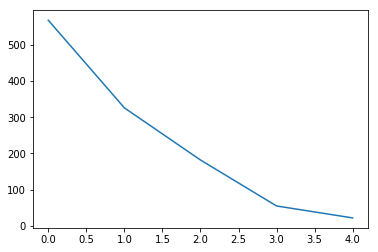

Real Percentage of gain: -35.9392401521222
Percentage of gain: -0.1986078445933189
Total gain: -229.19345266069004
000000000000000000000000000000000000000000000000
Percentile:  0
[[226  29]
 [276  39]]
0.4649122807017544
Percentile:  1
[[102  21]
 [171  31]]
0.40923076923076923
Percentile:  2
[[58 16]
 [98  9]]
0.3701657458563536
Percentile:  3
[[13  0]
 [41  0]]
0.24074074074074073
Percentile:  4
[[ 2  0]
 [19  1]]
0.13636363636363635
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5054112554112554
0.5771230502599654
F1,score 0.49920000000000003
G-score: 0.4553623786386904
Accuracy 0.45753899480069327
Window: 28
[[216 272]
 [354 312]]
Vol pos 1.3705709881696784
Vol neg 1.1435578571274367


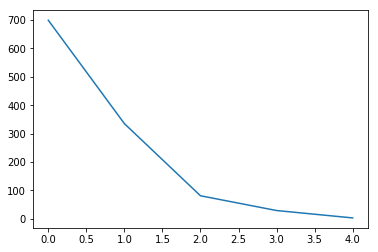

Real Percentage of gain: -32.90237665463287
Percentage of gain: 0.006754127549232849
Total gain: 7.794263191814707
000000000000000000000000000000000000000000000000
Percentile:  0
[[160 150]
 [238 151]]
0.4449213161659514
Percentile:  1
[[ 46 109]
 [ 89  91]]
0.408955223880597
Percentile:  2
[[10 13]
 [12 46]]
0.691358024691358
Percentile:  3
[[ 0  0]
 [ 9 20]]
0.6896551724137931
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.469728303853023
Mean gain over portfolio :  -13.60527020229207
Real mean gain over portfolio -1.5355303511959373


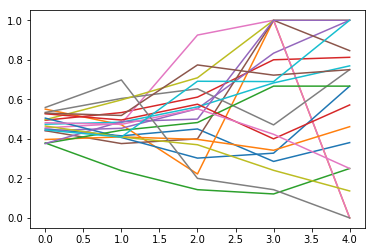

In [9]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
   
    
    
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

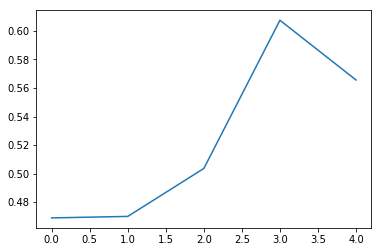

In [10]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.2724867724867725
G-score: 0.3945138170294869
Accuracy 0.5141342756183745
Window: 140
[[479  29]
 [521 103]]
Vol pos 3.343254409300078
Vol neg 2.960498678106556


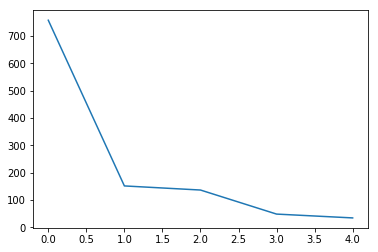

Real Percentage of gain: -10.417347955230152
Percentage of gain: 0.2804768491643457
Total gain: 317.49979325403933
000000000000000000000000000000000000000000000000
Percentile:  0
[[368  16]
 [371   4]]
0.4901185770750988
Percentile:  1
[[58  8]
 [69 15]]
0.4866666666666667
Percentile:  2
[[53  5]
 [43 36]]
0.6496350364963503
Percentile:  3
[[ 0  0]
 [11 38]]
0.7755102040816326
Percentile:  4
[[ 0  0]
 [25 10]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.12083333333333333
G-score: 0.24561398975231366
Accuracy 0.254416961130742
Window: 140
[[230  21]
 [823  58]]
Vol pos 2.3224632618496233
Vol neg 2.3707374470965905


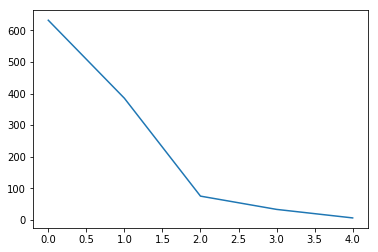

Real Percentage of gain: -237.50962095879464
Percentage of gain: -1.1767075847498507
Total gain: -1332.032985936831
000000000000000000000000000000000000000000000000
Percentile:  0
[[196   3]
 [425   7]]
0.32171156893819336
Percentile:  1
[[ 24  12]
 [331  18]]
0.10909090909090909
Percentile:  2
[[10  6]
 [52  7]]
0.22666666666666666
Percentile:  3
[[ 0  0]
 [12 21]]
0.6363636363636364
Percentile:  4
[[0 0]
 [3 3]]
0.5
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.291350531107739
G-score: 0.41293473781088147
Accuracy 0.2837423312883436
Window: 140
[[ 89   0]
 [467  96]]
Vol pos 1.5538144242869703
Vol neg 2.3036903571474783


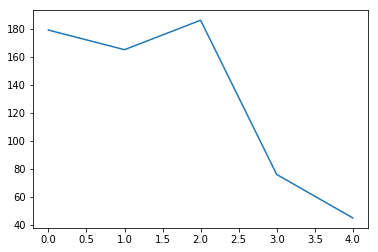

Real Percentage of gain: -99.02373987588972
Percentage of gain: -1.2091529575073356
Total gain: -788.3677282947829
000000000000000000000000000000000000000000000000
Percentile:  0
[[70  0]
 [91 18]]
0.49162011173184356
Percentile:  1
[[ 19   0]
 [143   3]]
0.13333333333333333
Percentile:  2
[[  0   0]
 [121  65]]
0.34946236559139787
Percentile:  3
[[ 0  0]
 [66 10]]
0.13157894736842105
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.5587301587301587
G-score: 0.5061189140684587
Accuracy 0.508833922261484
Window: 140
[[224 230]
 [326 352]]
Vol pos 2.8650822224755905
Vol neg 3.029914074121817


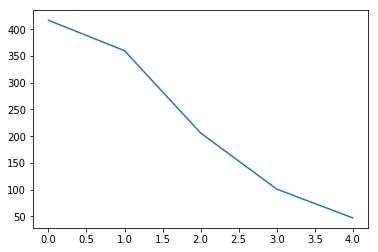

Real Percentage of gain: -44.57526198209261
Percentage of gain: -0.03033998680723511
Total gain: -34.344865065790145
000000000000000000000000000000000000000000000000
Percentile:  0
[[148  83]
 [107  78]]
0.5432692307692307
Percentile:  1
[[ 28  83]
 [ 98 151]]
0.49722222222222223
Percentile:  2
[[42 55]
 [39 70]]
0.5436893203883495
Percentile:  3
[[ 5  9]
 [64 23]]
0.27722772277227725
Percentile:  4
[[ 0  0]
 [18 29]]
0.6170212765957447
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.038781163434903045
G-score: 0.14042306565428608
Accuracy 0.3869257950530035
Window: 140
[[424   3]
 [691  14]]
Vol pos 1.1981156778866373
Vol neg 1.8000507285452012


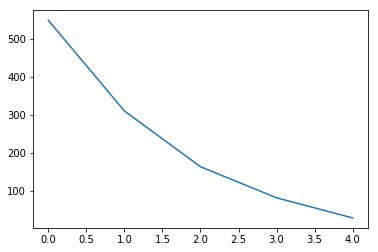

Real Percentage of gain: -50.09371297847132
Percentage of gain: -0.6399828080353556
Total gain: -724.4605386960225
000000000000000000000000000000000000000000000000
Percentile:  0
[[299   1]
 [246   3]]
0.5500910746812386
Percentile:  1
[[ 72   2]
 [233   3]]
0.24193548387096775
Percentile:  2
[[ 23   0]
 [134   6]]
0.17791411042944785
Percentile:  3
[[20  0]
 [59  2]]
0.2716049382716049
Percentile:  4
[[10  0]
 [18  0]]
0.35714285714285715
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.5567651632970451
G-score: 0.5652867872289253
Accuracy 0.49646643109540634
Window: 140
[[204  59]
 [511 358]]
Vol pos 3.4319284715169953
Vol neg 2.732405040791249


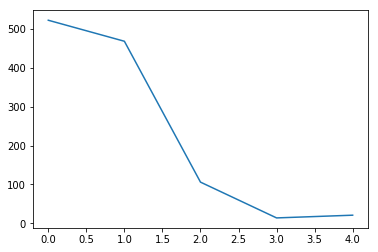

Real Percentage of gain: -56.878188518502064
Percentage of gain: 0.3279796181462363
Total gain: 371.27292774153943
000000000000000000000000000000000000000000000000
Percentile:  0
[[196  16]
 [264  46]]
0.46360153256704983
Percentile:  1
[[  7  30]
 [234 197]]
0.4358974358974359
Percentile:  2
[[ 0 13]
 [13 79]]
0.7523809523809524
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.03453237410071943
G-score: 0.1325501645418012
Accuracy 0.40724381625441697
Window: 140
[[449   0]
 [671  12]]
Vol pos 2.626837654147968
Vol neg 2.1333094608465237


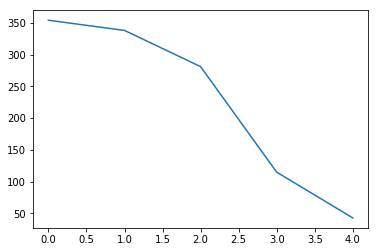

Real Percentage of gain: -95.90187496241337
Percentage of gain: -0.19476898380371385
Total gain: -220.4784896658041
000000000000000000000000000000000000000000000000
Percentile:  0
[[116   0]
 [233   5]]
0.3418079096045198
Percentile:  1
[[114   0]
 [225   2]]
0.34017595307917886
Percentile:  2
[[127   0]
 [147   4]]
0.4712230215827338
Percentile:  3
[[63  0]
 [51  0]]
0.5526315789473685
Percentile:  4
[[29  0]
 [13  1]]
0.6976744186046512
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.5554502369668246
G-score: 0.5844917991303857
Accuracy 0.5856890459363958
Window: 140
[[370 141]
 [328 293]]
Vol pos 2.095941138709416
Vol neg 1.4881195329882917


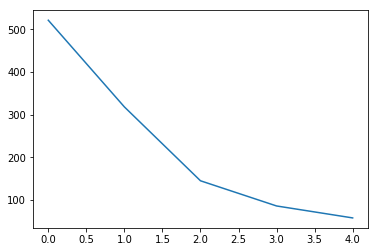

Real Percentage of gain: 69.94058845718602
Percentage of gain: 0.6110255423964964
Total gain: 691.6809139928339
000000000000000000000000000000000000000000000000
Percentile:  0
[[147  84]
 [136 154]]
0.5777351247600768
Percentile:  1
[[ 56  49]
 [135  78]]
0.42138364779874216
Percentile:  2
[[56  8]
 [41 40]]
0.6620689655172414
Percentile:  3
[[58  0]
 [10 18]]
0.8837209302325582
Percentile:  4
[[52  0]
 [ 5  1]]
0.9137931034482759
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.4080076263107722
G-score: 0.44585407294183194
Accuracy 0.45141342756183744
Window: 140
[[297 244]
 [377 214]]
Vol pos 2.911691125582792
Vol neg 2.814667721781709


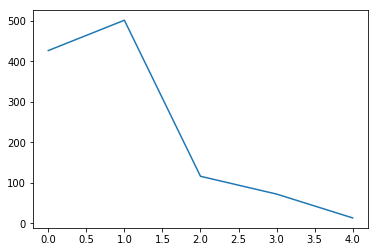

Real Percentage of gain: -79.25801812167416
Percentage of gain: -0.22971244704384694
Total gain: -260.0344900536347
000000000000000000000000000000000000000000000000
Percentile:  0
[[125 102]
 [130  70]]
0.4566744730679157
Percentile:  1
[[120  78]
 [190 114]]
0.46613545816733065
Percentile:  2
[[ 6 36]
 [47 27]]
0.28448275862068967
Percentile:  3
[[35 25]
 [ 9  3]]
0.5277777777777778
Percentile:  4
[[10  3]
 [ 0  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.47601476014760147
G-score: 0.5028230408930777
Accuracy 0.49823321554770317
Window: 140
[[306 170]
 [398 258]]
Vol pos 4.145101012146773
Vol neg 3.401246439087907


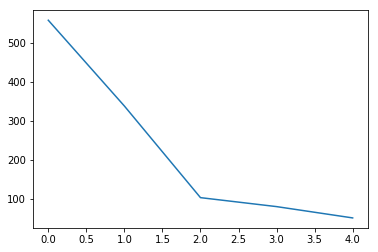

Real Percentage of gain: -76.8982862092434
Percentage of gain: 0.35859451718096186
Total gain: 405.9289934488488
000000000000000000000000000000000000000000000000
Percentile:  0
[[208 104]
 [179  67]]
0.492831541218638
Percentile:  1
[[ 88  30]
 [145  75]]
0.4822485207100592
Percentile:  2
[[10 21]
 [52 20]]
0.2912621359223301
Percentile:  3
[[ 0 15]
 [12 53]]
0.6625
Percentile:  4
[[ 0  0]
 [ 9 42]]
0.8235294117647058
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.16844349680170576
G-score: 0.2948990725881775
Accuracy 0.31095406360424027
Window: 140
[[273  24]
 [756  79]]
Vol pos 3.6629755928546683
Vol neg 4.643368185349474


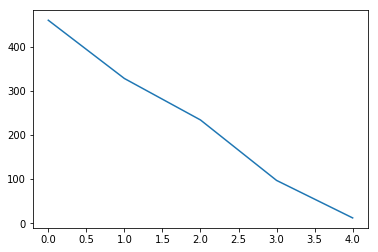

Real Percentage of gain: -318.5454759773517
Percentage of gain: -2.0604768338230977
Total gain: -2332.4597758877467
000000000000000000000000000000000000000000000000
Percentile:  0
[[147  23]
 [273  17]]
0.3565217391304348
Percentile:  1
[[ 59   1]
 [218  50]]
0.3323170731707317
Percentile:  2
[[ 38   0]
 [183  12]]
0.2145922746781116
Percentile:  3
[[27  0]
 [70  0]]
0.27835051546391754
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.6440677966101694
G-score: 0.47776654295295456
Accuracy 0.5378973105134475
Window: 140
[[ 49  84]
 [105 171]]
Vol pos 1.3872918397725065
Vol neg 0.7631044221426431


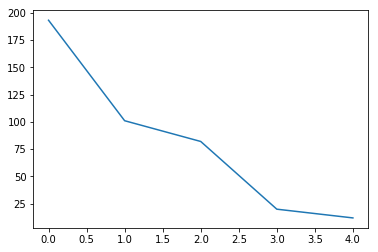

Real Percentage of gain: 90.04569573618124
Percentage of gain: 0.39358794367968675
Total gain: 160.97746896499189
000000000000000000000000000000000000000000000000
Percentile:  0
[[26 73]
 [49 48]]
0.37755102040816324
Percentile:  1
[[16 10]
 [30 42]]
0.5918367346938775
Percentile:  2
[[ 7  0]
 [21 54]]
0.7439024390243902
Percentile:  3
[[ 0  0]
 [ 5 14]]
0.7368421052631579
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.3961661341853035
G-score: 0.4926716619039526
Accuracy 0.4991166077738516
Window: 140
[[379  14]
 [553 186]]
Vol pos 2.74494990680026
Vol neg 2.532673734676172


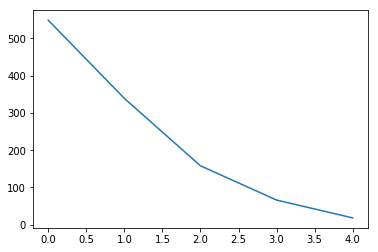

Real Percentage of gain: -154.59889057315473
Percentage of gain: 0.10147587436462668
Total gain: 114.8706897807574
000000000000000000000000000000000000000000000000
Percentile:  0
[[253  14]
 [252  30]]
0.5154826958105647
Percentile:  1
[[ 78   0]
 [192  69]]
0.4336283185840708
Percentile:  2
[[25  0]
 [89 44]]
0.43670886075949367
Percentile:  3
[[23  0]
 [17 26]]
0.7424242424242424
Percentile:  4
[[ 0  0]
 [ 1 17]]
0.9444444444444444
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.731043421905379
G-score: 0.5773770336830314
Accuracy 0.6333922261484098
Window: 140
[[153 165]
 [250 564]]
Vol pos 1.8853341025416357
Vol neg 1.919008596662774


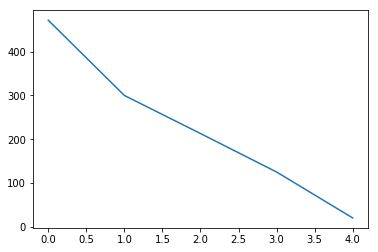

Real Percentage of gain: 202.6043881008516
Percentage of gain: 0.4906324946177576
Total gain: 555.3959839073016
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 62 101]
 [ 77 232]]
0.6228813559322034
Percentile:  1
[[ 42  13]
 [ 90 155]]
0.6566666666666666
Percentile:  2
[[ 19   7]
 [ 63 124]]
0.6713615023474179
Percentile:  3
[[23 33]
 [20 49]]
0.576
Percentile:  4
[[ 6 11]
 [ 0  3]]
0.45
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5606986899563319
G-score: 0.5925874128545493
Accuracy 0.5556537102473498
Window: 140
[[308  61]
 [442 321]]
Vol pos 2.3655971616730906
Vol neg 2.6571050276975625


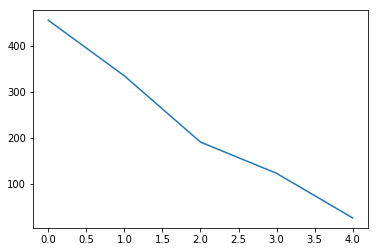

Real Percentage of gain: -14.568325637078852
Percentage of gain: 0.13377807929372793
Total gain: 151.43678576050002
000000000000000000000000000000000000000000000000
Percentile:  0
[[188  20]
 [191  56]]
0.5362637362637362
Percentile:  1
[[105  25]
 [ 75 130]]
0.7014925373134329
Percentile:  2
[[ 7  7]
 [87 91]]
0.5104166666666666
Percentile:  3
[[ 5  5]
 [80 32]]
0.30327868852459017
Percentile:  4
[[ 3  4]
 [ 8 11]]
0.5384615384615384
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6977985323549032
G-score: 0.5247163541339024
Accuracy 0.5998233215547704
Window: 140
[[156 255]
 [198 523]]
Vol pos 3.631937077645788
Vol neg 2.4123861424451283


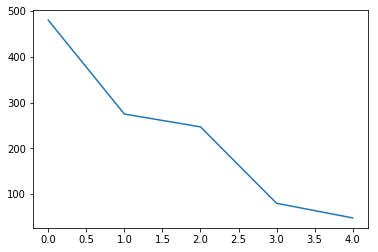

Real Percentage of gain: 139.56540362438218
Percentage of gain: 1.2131398879804305
Total gain: 1373.2743531938472
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 167]
 [ 70 204]]
0.50625
Percentile:  1
[[49 76]
 [51 99]]
0.5381818181818182
Percentile:  2
[[ 21   4]
 [ 71 151]]
0.6963562753036437
Percentile:  3
[[14  3]
 [ 6 57]]
0.8875
Percentile:  4
[[32  5]
 [ 0 11]]
0.8958333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.4811102544333076
G-score: 0.41973290883981024
Accuracy 0.40547703180212014
Window: 140
[[147 174]
 [499 312]]
Vol pos 3.2620899381011133
Vol neg 2.6547667370772947


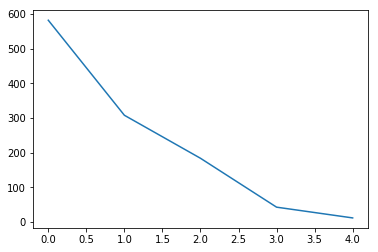

Real Percentage of gain: -159.37848646431513
Percentage of gain: -0.25561725482739245
Total gain: -289.35873246460824
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76  61]
 [300 145]]
0.3797250859106529
Percentile:  1
[[ 13  38]
 [159  98]]
0.36038961038961037
Percentile:  2
[[55 65]
 [38 26]]
0.44021739130434784
Percentile:  3
[[ 3 10]
 [ 1 29]]
0.7441860465116279
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.7003154574132492
G-score: 0.42039210325542564
Accuracy 0.5803886925795053
Window: 140
[[102 470]
 [  5 555]]
Vol pos 2.8397456847920473
Vol neg 3.7498949971878694


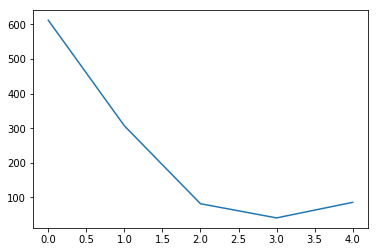

Real Percentage of gain: -126.16343855600401
Percentage of gain: 0.07465794279517414
Total gain: 84.51279124413713
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 34 295]
 [  5 278]]
0.5098039215686274
Percentile:  1
[[ 54  49]
 [  0 204]]
0.8403908794788274
Percentile:  2
[[ 1 11]
 [ 0 70]]
0.8658536585365854
Percentile:  3
[[ 2 39]
 [ 0  0]]
0.04878048780487805
Percentile:  4
[[11 75]
 [ 0  0]]
0.12790697674418605
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.02574002574002574
G-score: 0.11410153965655029
Accuracy 0.33127208480565373
Window: 140
[[365   1]
 [756  10]]
Vol pos 0.9801939872937734
Vol neg 1.6427284144821444


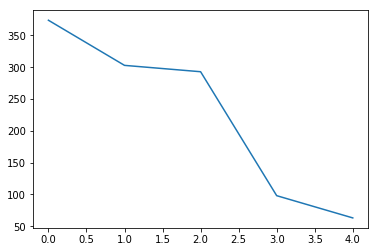

Real Percentage of gain: -255.7775912288066
Percentage of gain: -0.7738274421623836
Total gain: -875.9726645278183
000000000000000000000000000000000000000000000000
Percentile:  0
[[188   0]
 [182   3]]
0.5120643431635389
Percentile:  1
[[ 97   0]
 [202   4]]
0.3333333333333333
Percentile:  2
[[ 67   1]
 [224   1]]
0.23208191126279865
Percentile:  3
[[12  0]
 [84  2]]
0.14285714285714285
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.5365853658536585
G-score: 0.5705726160259476
Accuracy 0.5300353356890459
Window: 140
[[292  64]
 [468 308]]
Vol pos 3.771780348290867
Vol neg 2.8496103584453123


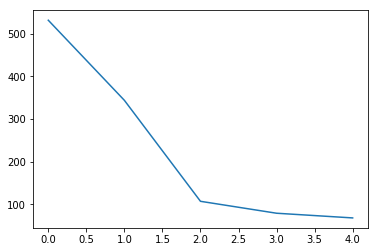

Real Percentage of gain: 64.92027677496992
Percentage of gain: 0.6599606875279274
Total gain: 747.0754982816138
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  39]
 [207  92]]
0.5375939849624061
Percentile:  1
[[ 37  11]
 [191 105]]
0.4127906976744186
Percentile:  2
[[ 3 14]
 [48 42]]
0.4205607476635514
Percentile:  3
[[11  0]
 [22 46]]
0.7215189873417721
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.46855548032330513
Mean gain over portfolio :  -94.17920355113135
Real mean gain over portfolio -60.62559536527258


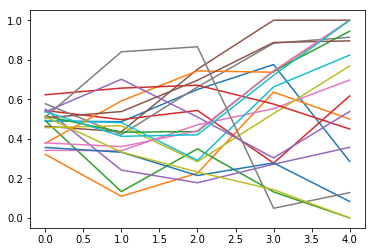

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
   
    
    
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        

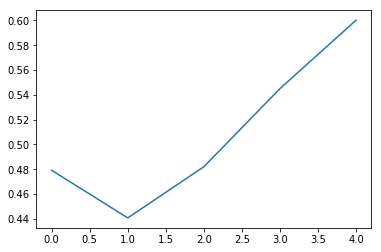

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5548862115127176
0.6080357142857142
F1,score 0.3815165876777251
G-score: 0.4851185040842707
Accuracy 0.5339285714285714
Window: 200
[[437   2]
 [520 161]]
Vol pos 4.8816949853714275
Vol neg 3.4020424078607965


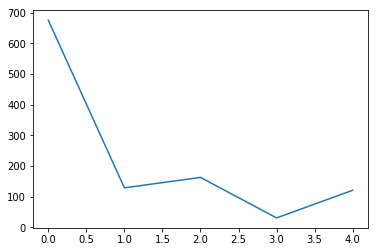

Real Percentage of gain: 70.12051712125246
Percentage of gain: 1.0208816645971233
Total gain: 1143.387464348778
000000000000000000000000000000000000000000000000
Percentile:  0
[[279   1]
 [378  16]]
0.43768545994065283
Percentile:  1
[[73  1]
 [41 14]]
0.6744186046511628
Percentile:  2
[[77  0]
 [49 37]]
0.6993865030674846
Percentile:  3
[[ 8  0]
 [ 1 22]]
0.967741935483871
Percentile:  4
[[ 0  0]
 [49 72]]
0.5950413223140496
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125641597857622
0.8303571428571429
F1,score 0.2507015902712815
G-score: 0.3745587859032813
Accuracy 0.28482142857142856
Window: 200
[[185   5]
 [796 134]]
Vol pos 2.253624207240816
Vol neg 3.1311408058329273


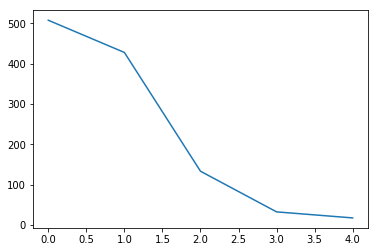

Real Percentage of gain: -249.41934941866413
Percentage of gain: -1.5974443422878166
Total gain: -1789.1376633623547
000000000000000000000000000000000000000000000000
Percentile:  0
[[184   4]
 [279  41]]
0.44291338582677164
Percentile:  1
[[  1   1]
 [377  49]]
0.11682242990654206
Percentile:  2
[[  0   0]
 [107  26]]
0.19548872180451127
Percentile:  3
[[ 0  0]
 [23  9]]
0.28125
Percentile:  4
[[0 0]
 [9 8]]
0.47058823529411764
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31081608746583367
0.9765625
F1,score 0.2419127988748242
G-score: 0.3709447398198282
Accuracy 0.1578125
Window: 200
[[ 15   0]
 [539  86]]
Vol pos 2.537688056515927
Vol neg 2.7552977009262656


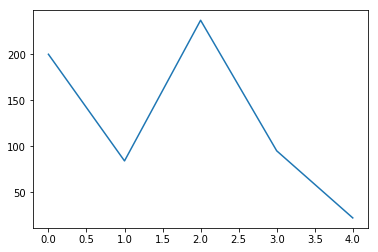

Real Percentage of gain: -158.90549703251548
Percentage of gain: -1.9199983860799192
Total gain: -1228.7989670911484
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15   0]
 [174  11]]
0.13
Percentile:  1
[[ 0  0]
 [72 12]]
0.14285714285714285
Percentile:  2
[[  0   0]
 [174  63]]
0.26582278481012656
Percentile:  3
[[ 0  0]
 [95  0]]
0.0
Percentile:  4
[[ 0  0]
 [22  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6355724168712341
0.6625
F1,score 0.6825842696629213
G-score: 0.5615726857688301
Accuracy 0.5964285714285714
Window: 200
[[182 196]
 [256 486]]
Vol pos 3.9339621251725068
Vol neg 2.700341560020939


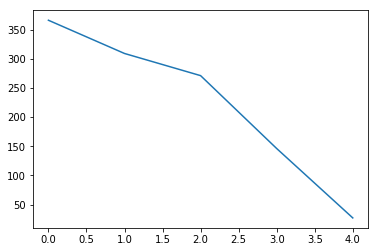

Real Percentage of gain: 19.294108114821658
Percentage of gain: 1.2565467093622948
Total gain: 1407.3323144857702
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82  96]
 [115  72]]
0.42191780821917807
Percentile:  1
[[ 45  53]
 [ 55 156]]
0.6504854368932039
Percentile:  2
[[ 50  42]
 [ 59 120]]
0.6273062730627307
Percentile:  3
[[  5   5]
 [ 27 109]]
0.7808219178082192
Percentile:  4
[[27]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6749219098616689
0.6848214285714286
F1,score 0.11151515151515151
G-score: 0.2406972179884214
Accuracy 0.3455357142857143
Window: 200
[[341  12]
 [721  46]]
Vol pos 1.2960428818612266
Vol neg 2.0781285852006417


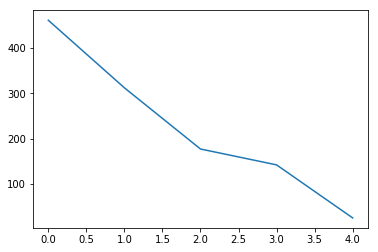

Real Percentage of gain: -130.99437613192262
Percentage of gain: -0.9122318372069427
Total gain: -1021.6996576717758
000000000000000000000000000000000000000000000000
Percentile:  0
[[199   6]
 [245  11]]
0.455531453362256
Percentile:  1
[[120   4]
 [184   4]]
0.3974358974358974
Percentile:  2
[[ 21   2]
 [136  18]]
0.22033898305084745
Percentile:  3
[[  1   0]
 [133   8]]
0.06338028169014084
Percentile:  4
[[ 0  0]
 [20  5]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5437304774654173
0.8705357142857143
F1,score 0.5881533101045295
G-score: 0.5651474929352506
Accuracy 0.47232142857142856
Window: 200
[[107  38]
 [553 422]]
Vol pos 4.196668263409926
Vol neg 2.964302835504544


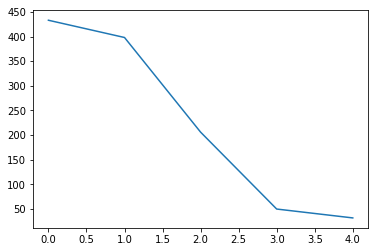

Real Percentage of gain: -92.63675602997283
Percentage of gain: 0.4179772638934511
Total gain: 468.13453556066526
000000000000000000000000000000000000000000000000
Percentile:  0
[[104   5]
 [276  49]]
0.35253456221198154
Percentile:  1
[[  3  32]
 [172 190]]
0.48614609571788414
Percentile:  2
[[  0   1]
 [ 91 114]]
0.5533980582524272
Percentile:  3
[[ 0  0]
 [13 36]]
0.7346938775510204
Percentile:  4
[[32]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6316376617581437
0.5767857142857142
F1,score 0.16688741721854305
G-score: 0.2967472680549754
Accuracy 0.43839285714285714
Window: 200
[[428  46]
 [583  63]]
Vol pos 2.219292365412003
Vol neg 2.6123157586934864


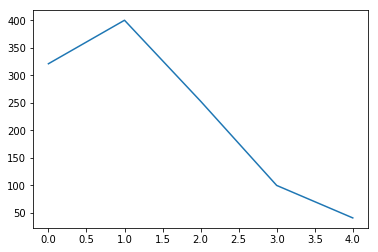

Real Percentage of gain: -173.25081946500396
Percentage of gain: -0.4941732685722406
Total gain: -553.4740608009095
000000000000000000000000000000000000000000000000
Percentile:  0
[[158  12]
 [135  16]]
0.5420560747663551
Percentile:  1
[[156  14]
 [211  19]]
0.4375
Percentile:  2
[[ 75  10]
 [149  19]]
0.3715415019762846
Percentile:  3
[[18  5]
 [73  4]]
0.22
Percentile:  4
[[20  5]
 [12  4]]
0.5853658536585366
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7139031466190583
0.5776785714285714
F1,score 0.45161290322580644
G-score: 0.5075895005914443
Accuracy 0.5142857142857142
Window: 200
[[352 121]
 [423 224]]
Vol pos 2.485227411048352
Vol neg 1.7836094219793939


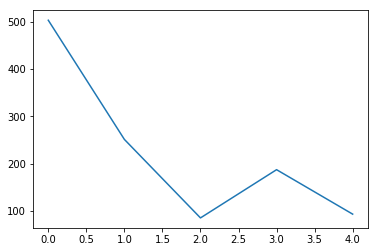

Real Percentage of gain: 76.87929083364786
Percentage of gain: 0.4117923778634468
Total gain: 461.2074632070604
000000000000000000000000000000000000000000000000
Percentile:  0
[[137  93]
 [165 111]]
0.4901185770750988
Percentile:  1
[[ 16  23]
 [130  78]]
0.3805668016194332
Percentile:  2
[[ 9  4]
 [60 15]]
0.2727272727272727
Percentile:  3
[[113   1]
 [ 59  14]]
0.679144385026738
Percentile:  4
[[76  0]
 [ 8  6]]
0.9111111111111111
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.4478910957375586
0.5348214285714286
F1,score 0.49180327868852464
G-score: 0.438473501297487
Accuracy 0.44642857142857145
Window: 200
[[200 321]
 [299 300]]
Vol pos 3.3072457206390014
Vol neg 3.427567321906145


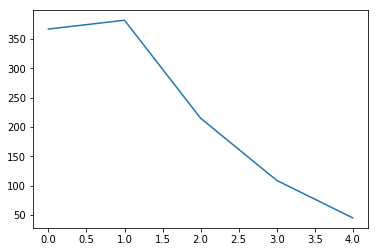

Real Percentage of gain: -81.96682487175799
Percentage of gain: -0.4209543564842049
Total gain: -471.46887926230943
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64  74]
 [123 106]]
0.46321525885558584
Percentile:  1
[[ 60 103]
 [ 91 128]]
0.49214659685863876
Percentile:  2
[[ 32 103]
 [ 41  39]]
0.3302325581395349
Percentile:  3
[[29 37]
 [24 19]]
0.44036697247706424
Percentile:  4
[[15  4]
 [18  8]]
0.5111111111111111
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6510486390004462
0.6419642857142858
F1,score 0.44566210045662097
G-score: 0.47712747048829457
Accuracy 0.45803571428571427
Window: 200
[[269 132]
 [475 244]]
Vol pos 6.3351495830312965
Vol neg 3.2658601866215116


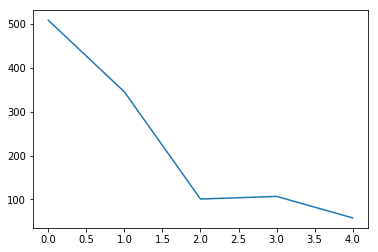

Real Percentage of gain: -146.15000928045578
Percentage of gain: 1.1317451810855335
Total gain: 1267.5546028157974
000000000000000000000000000000000000000000000000
Percentile:  0
[[145  69]
 [267  26]]
0.33727810650887574
Percentile:  1
[[116  53]
 [148  28]]
0.41739130434782606
Percentile:  2
[[ 8 10]
 [55 28]]
0.3564356435643564
Percentile:  3
[[  0   0]
 [  4 103]]
0.9626168224299065
Percentile:  4
[[58]]
1.0
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.625083686677081
0.7964285714285714
F1,score 0.03090507726269316
G-score: 0.1252799555578385
Accuracy 0.21607142857142858
Window: 200
[[228   0]
 [878  14]]
Vol pos 4.09359648192831
Vol neg 5.704544200305499


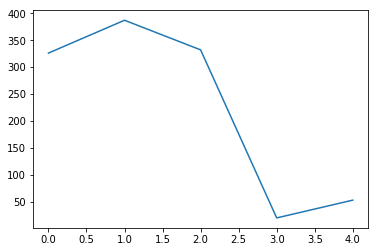

Real Percentage of gain: -724.1253954620786
Percentage of gain: -3.5874459457514076
Total gain: -4017.9394592415765
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88   0]
 [237   1]]
0.27300613496932513
Percentile:  1
[[ 98   0]
 [283   6]]
0.268733850129199
Percentile:  2
[[ 42   0]
 [283   7]]
0.14759036144578314
Percentile:  3
[[ 0  0]
 [20  0]]
0.0
Percentile:  4
[[ 0  0]
 [53  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5384130982367759
0.690176322418136
F1,score 0.6336633663366337
G-score: 0.4968597608791553
Accuracy 0.5340050377833753
Window: 200
[[ 52  71]
 [114 160]]
Vol pos 1.6933020857567551
Vol neg 0.8996242345090143


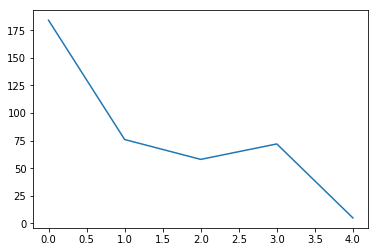

Real Percentage of gain: 118.43716968362021
Percentage of gain: 0.48501148311401615
Total gain: 192.54955879626442
000000000000000000000000000000000000000000000000
Percentile:  0
[[49 60]
 [43 32]]
0.44021739130434784
Percentile:  1
[[ 3  9]
 [45 19]]
0.2894736842105263
Percentile:  2
[[ 0  1]
 [19 38]]
0.6551724137931034
Percentile:  3
[[ 0  0]
 [ 7 65]]
0.9027777777777778
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.711958946898706
0.7223214285714286
F1,score 0.35736040609137054
G-score: 0.46642527160584196
Accuracy 0.4348214285714286
Window: 200
[[311   0]
 [633 176]]
Vol pos 3.6877609971531107
Vol neg 2.7955883860992117


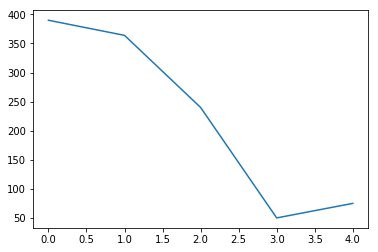

Real Percentage of gain: -84.68845114126545
Percentage of gain: 0.023510854654253625
Total gain: 26.33215721276406
000000000000000000000000000000000000000000000000
Percentile:  0
[[147   0]
 [243   0]]
0.3769230769230769
Percentile:  1
[[121   0]
 [230  13]]
0.36813186813186816
Percentile:  2
[[ 42   0]
 [138  59]]
0.4225941422594142
Percentile:  3
[[ 0  0]
 [ 7 43]]
0.86
Percentile:  4
[[ 0  0]
 [14 61]]
0.8133333333333334
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5219817005132783
0.7839285714285714
F1,score 0.7227533460803058
G-score: 0.5611482232451719
Accuracy 0.6116071428571429
Window: 200
[[118 124]
 [311 567]]
Vol pos 2.471681114665222
Vol neg 2.1877900273248154


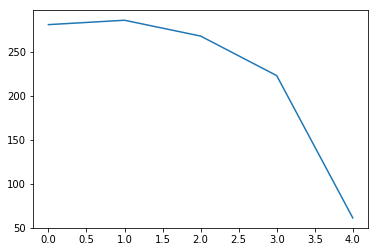

Real Percentage of gain: 195.79551164253374
Percentage of gain: 0.66197580505302
Total gain: 741.4129016593824
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 28  25]
 [ 95 137]]
0.5789473684210527
Percentile:  1
[[ 30  13]
 [113 129]]
0.5578947368421052
Percentile:  2
[[ 27  36]
 [ 64 139]]
0.6240601503759399
Percentile:  3
[[ 27  41]
 [ 38 115]]
0.6425339366515838
Percentile:  4
[[ 6  9]
 [ 1 45]]
0.8360655737704918
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6786431600089265
0.7205357142857143
F1,score 0.5052083333333334
G-score: 0.5462449568263105
Accuracy 0.49107142857142855
Window: 200
[[259  54]
 [516 291]]
Vol pos 2.93369460341709
Vol neg 3.290227700204211


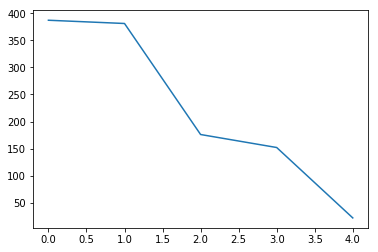

Real Percentage of gain: -63.976593613330415
Percentage of gain: -0.233837283247322
Total gain: -261.89775723700063
000000000000000000000000000000000000000000000000
Percentile:  0
[[145   9]
 [173  60]]
0.5297157622739018
Percentile:  1
[[109  36]
 [143  93]]
0.5301837270341208
Percentile:  2
[[  5   9]
 [106  56]]
0.3465909090909091
Percentile:  3
[[ 0  0]
 [88 64]]
0.42105263157894735
Percentile:  4
[[ 0  0]
 [ 6 16]]
0.7272727272727273
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4675295692925686
0.7
F1,score 0.7154574132492113
G-score: 0.4685586344072116
Accuracy 0.5973214285714286
Window: 200
[[102 234]
 [217 567]]
Vol pos 4.610993304220025
Vol neg 3.1747846216103013


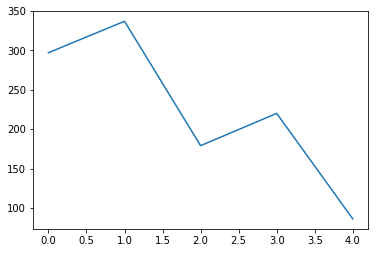

Real Percentage of gain: 74.29670912524624
Percentage of gain: 1.4758273715865629
Total gain: 1652.9266561769505
000000000000000000000000000000000000000000000000
Percentile:  0
[[  5  97]
 [ 48 146]]
0.5101351351351351
Percentile:  1
[[ 10  76]
 [116 136]]
0.4319526627218935
Percentile:  2
[[ 16  25]
 [ 33 104]]
0.6741573033707865
Percentile:  3
[[ 48  24]
 [ 15 133]]
0.8227272727272728
Percentile:  4
[[23 12]
 [ 5 46]]
0.8023255813953488
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7344935296742525
0.7526785714285714
F1,score 0.4351204351204351
G-score: 0.36809893893243
Accuracy 0.3508928571428571
Window: 200
[[113 164]
 [563 280]]
Vol pos 4.248304122409431
Vol neg 3.5166610185592453


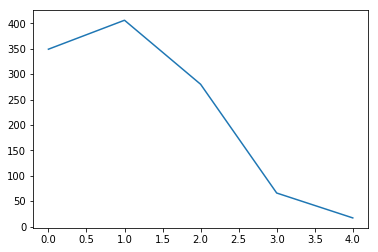

Real Percentage of gain: -182.90087503418096
Percentage of gain: -0.791990214630058
Total gain: -887.029040385665
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 27  41]
 [205  78]]
0.29914529914529914
Percentile:  1
[[ 30  51]
 [234  89]]
0.29455445544554454
Percentile:  2
[[ 41  34]
 [119  85]]
0.45161290322580644
Percentile:  3
[[13 36]
 [ 4 13]]
0.3939393939393939
Percentile:  4
[[ 2  2]
 [ 0 14]]
0.8888888888888888
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.4758928571428571
0.49107142857142855
F1,score 0.7236842105263158
G-score: 0.512989176042577
Accuracy 0.625
Window: 200
[[150 420]
 [  0 550]]
Vol pos 3.436982858233169
Vol neg 5.3106065884964755


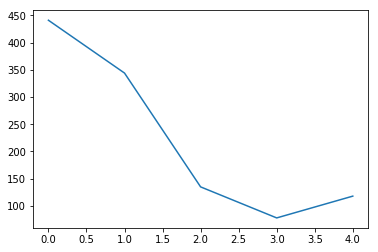

Real Percentage of gain: -255.1891535481747
Percentage of gain: 0.15663681570955248
Total gain: 175.43323359469878
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 53 203]
 [  0 185]]
0.5396825396825397
Percentile:  1
[[ 80  34]
 [  0 230]]
0.9011627906976745
Percentile:  2
[[  0   3]
 [  0 132]]
0.9777777777777777
Percentile:  3
[[ 6 72]
 [ 0  0]]
0.07692307692307693
Percentile:  4
[[ 11 107]
 [  0   0]]
0.09322033898305085
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.677376171352075
0.7044642857142858
F1,score 0.012594458438287152
G-score: 0.07960612799717214
Accuracy 0.3
Window: 200
[[331   0]
 [784   5]]
Vol pos 0.8050710766029961
Vol neg 1.9585271485232738


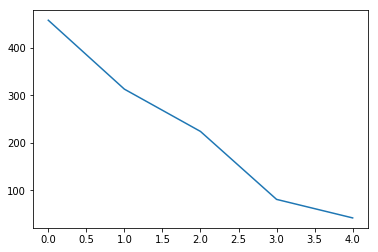

Real Percentage of gain: -253.92016128006514
Percentage of gain: -1.1294476809853928
Total gain: -1264.98140270364
000000000000000000000000000000000000000000000000
Percentile:  0
[[238   0]
 [220   0]]
0.519650655021834
Percentile:  1
[[ 88   0]
 [224   1]]
0.28434504792332266
Percentile:  2
[[  5   0]
 [215   4]]
0.04017857142857143
Percentile:  3
[[ 0  0]
 [81  0]]
0.0
Percentile:  4
[[ 0  0]
 [42  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.47657295850066933
0.725
F1,score 0.4947916666666666
G-score: 0.5369444005043116
Accuracy 0.48035714285714287
Window: 200
[[253  55]
 [527 285]]
Vol pos 6.090581638890057
Vol neg 3.131638377786315


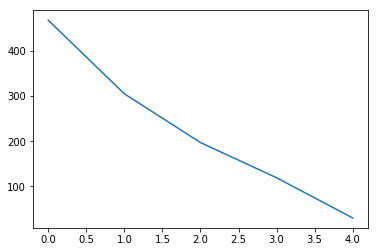

Real Percentage of gain: 39.64365222623336
Percentage of gain: 1.2983208802242991
Total gain: 1454.1193858512152
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 99  33]
 [305  33]]
0.28085106382978725
Percentile:  1
[[ 53  18]
 [143  88]]
0.46688741721854304
Percentile:  2
[[44  2]
 [59 92]]
0.6903553299492385
Percentile:  3
[[55  2]
 [19 43]]
0.8235294117647058
Percentile:  4
[[ 2  0]
 [ 0 28]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.44445694831774024
Mean gain over portfolio :  -125.30183070235164
Real mean gain over portfolio -100.18286517810164


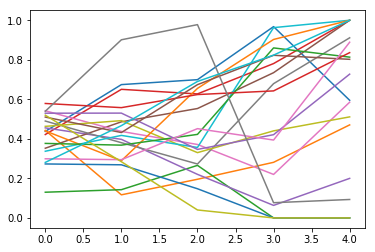

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
   
    
    
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rf = RandomForestClassifier()
        rf.fit(x_tv, y_tv)
        prediction=rf.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rf.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rf.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rf.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rf.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        
        
        
        

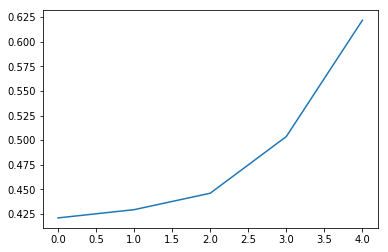

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()